In [2]:
import pandas as pd
df = pd.read_csv("../data/final/GME_features.csv", parse_dates=["time"], index_col="time")
df.head()


,Close,High,Low,Open,Volume,price_return,return_3h_mean,return_3h_std,volume_zscore
time,,,,,,,,,
2025-06-02 13:30:00,30.139999,30.496401,29.730000,29.870001,2376431,0.000000,NaN,NaN,NaN
2025-06-02 14:30:00,30.340000,30.420000,30.040001,30.110001,910996,0.006636,NaN,NaN,NaN
2025-06-02 15:30:00,30.125500,30.389999,30.020000,30.340000,829359,-0.007070,-0.000145,0.006854,NaN
2025-06-02 16:30:00,30.150000,30.270000,30.090000,30.150000,420770,0.000813,0.000126,0.006879,NaN
2025-06-02 17:30:00,30.740000,30.879999,30.135500,30.155001,1165139,0.019569,0.004437,0.013684,NaN


array([[<Axes: title={'center': 'price_return'}>,
        <Axes: title={'center': 'volume_zscore'}>]], dtype=object)

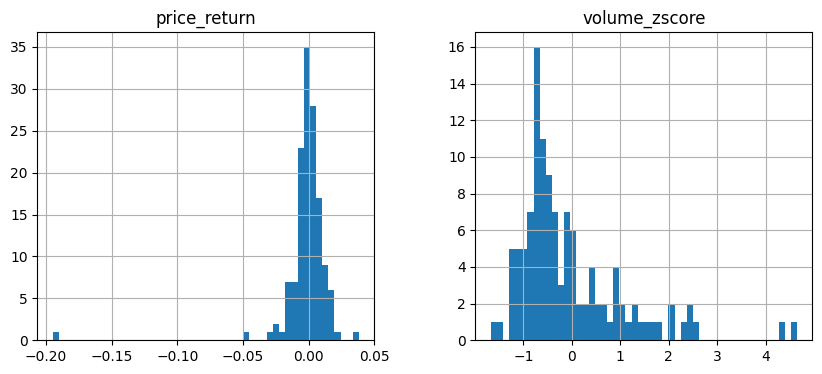

In [3]:
df[["price_return", "volume_zscore"]].hist(bins=50, figsize=(10,4))


In [ ]:
from sklearn.ensemble import IsolationForest

# Only select rows with complete data for features
features = [
    "price_return",
    "return_3h_mean",
    "return_3h_std",
    "volume_zscore",
    "reddit_sentiment_mean",
    "twitter_sentiment_mean",
    "reddit_message_count",
    "twitter_message_count"
]

df_model = df[features].dropna()

# Fit Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df["anomaly"] = 1  # initialize all as normal
df.loc[df_model.index, "anomaly"] = model.fit_predict(df_model)


In [5]:
df["anomaly"].value_counts()


anomaly
 1    138
-1      2
Name: count, dtype: int64

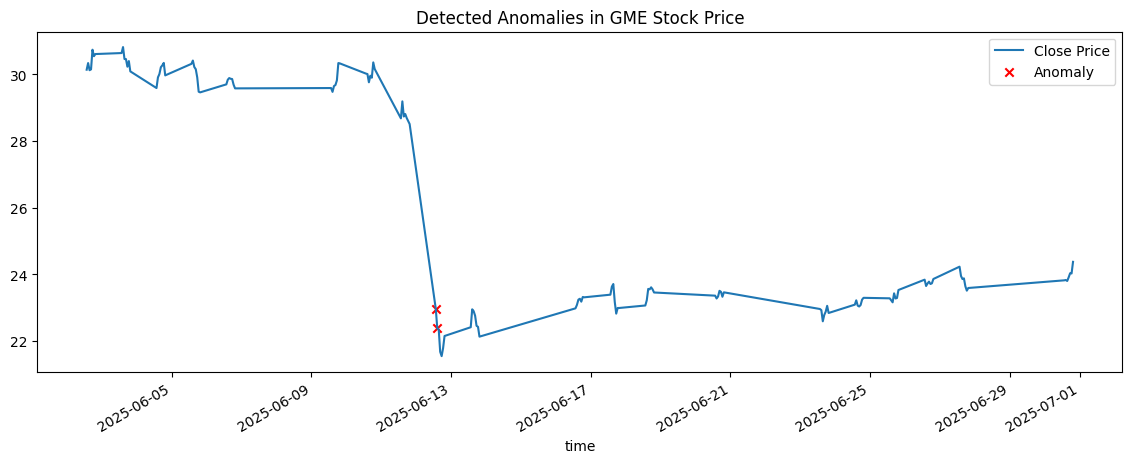

In [6]:
import matplotlib.pyplot as plt

df["Close"].plot(figsize=(14, 5), label="Close Price")
plt.scatter(df[df["anomaly"] == -1].index,
            df[df["anomaly"] == -1]["Close"],
            color="red", label="Anomaly", marker="x")
plt.legend()
plt.title("Detected Anomalies in GME Stock Price")
plt.show()


In [7]:
from joblib import dump

# Train your Isolation Forest model
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df[features])

# Save the model
dump(model, "../models/isolation_forest.joblib")


['../models/isolation_forest.joblib']